# Estudo de Correlações

Em estatística, correlação é uma relação ou semelhança entre duas variáveis.

```"Os dados podem ser representados por pares ordenados (x, y), sendo x a variável independente (ou explanatória) e y a variável dependente (ou resposta)." (LARSON e FARBER, 2015, p. 438).```

Para este estudo serão abordadas três tipos diferentes de correlação: Pearson, Spearman e ξ. O objetivo é identificar situações comparatívas entre as correlações e qual é a mais adequada de acordo com cenários diferentes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr, rankdata

In [2]:
plt.style.use('seaborn-darkgrid')

Os gráficos a seguir são padronizados pela função `plot_correlation`.

In [3]:
def plot_correlation(x_data, y_data, correlation=0, title='', subplot=None, line=None):
    
    '''
     Cria os gráficos padronizados das correlações.
     
     Parâmetros:
     x_data: Dados do eixo X
     y_data: Dados do eixo Y
     correlation: Utiliza o valor da correlação para criar a linha de regressão. Default = 0
     title: Adiciona título ao gráfico. Default = ''
     subplot: Organiza gráficos em linhas e colunas. Default = None
     line: Exibe a linha de regressão True ou False. Default = None 
    
    '''
    
    slope = correlation * (np.std(y_data) / np.std(x_data))
    intercept = np.mean(y_data) - (slope * np.mean(x_data))

    if subplot:
        plt.subplot(subplot)
    
    if line:
        x_values = np.array([min(x_data), max(x_data)])
        y_values = intercept + slope * x_values

        plt.plot(x_values, y_values, color='red')
        
    plt.scatter(x_data, y_data)
    plt.title(title, fontsize=15)
    
    plt.xlabel('X   ')
    plt.ylabel('Y   ',  rotation=0)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.axhline(min(y_data), color='black', linewidth=0.7)
    plt.axvline(min(x_data), color='black', linewidth=0.7)

Existem classificações de correlação conforme o comportamento dos dados:

- **Correlação linear positiva**: Ocorre quando duas variáveis aumentam ou diminuem juntas de forma linear. Ou seja, conforme uma variável aumenta, a outra também aumenta, ou conforme uma variável diminui, a outra também diminui. Um coeficiente de correlação próximo de +1 indica uma forte correlação linear positiva.


- **Correlação linear negativa**: Ocorre quando uma variável aumenta enquanto a outra diminui de forma linear. Um coeficiente de correlação próximo de -1 indica uma forte correlação linear negativa.


- **Não há correlação**: Quando não há correlação, não existe uma relação linear aparente entre duas variáveis. O coeficiente de correlação é próximo de 0. Isso significa que o comportamento de uma variável não fornece nenhuma informação sobre o comportamento da outra.


- **Correlação não linear**: Ocorre quando a relação entre duas variáveis não segue uma linha reta, mas ainda existe algum tipo de relação.


Os dois tipos mais comuns de correlação são a de Pearson e a de Spearman. Em ambos os casos, o coeficiente é uma medida que varia de -1 a +1.

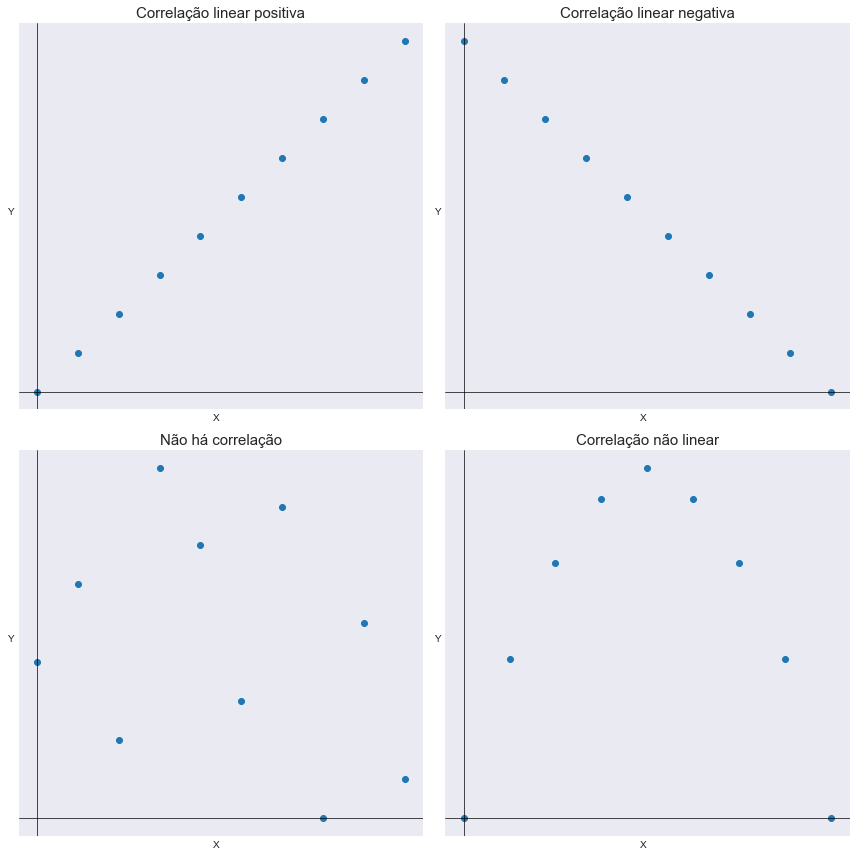

In [4]:
x_corr_pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_corr_pos = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

x_corr_neg = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_corr_neg = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

x_no_corr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_no_corr = [5, 7, 3, 10, 8, 4, 9, 1, 6, 2]

x_nonlinear = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
y_nonlinear = [0, 2, 3, 4, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5, 0, -0.5]

x_nonlinear = [0, 1, 2, 3, 4, 5, 6, 7, 8]
y_nonlinear = [0, 0.5, 0.8, 1, 1.1, 1, 0.8, 0.5, 0]

plt.figure(figsize=(12, 12))

plot_correlation(x_corr_pos,
                 y_corr_pos, 
                 title=f'Correlação linear positiva',
                 subplot=221,
                 line=False)

plot_correlation(x_corr_neg,
                 y_corr_neg,
                 title=f'Correlação linear negativa',
                 subplot=222,
                 line=False)

plot_correlation(x_no_corr,
                 y_no_corr, 
                 title=f'Não há correlação',
                 subplot=223,
                 line=False)

plot_correlation(x_nonlinear,
                 y_nonlinear,
                 title=f'Correlação não linear',
                 subplot=224,
                 line=False)

plt.tight_layout()
plt.show()

## Pearson

O coeficiente de correlação de Pearson (𝑟) mede relações entre duas variáveis lineares. O cálculo é dado pela fórmula:

$$
r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$

Sendo assim, numa relação de dados curvilínea, o coeficiente de correlação será próximo de zero.

In [5]:
def calculate_pearson_correlation(x_data, y_data):
    
    '''
    
     Calcula a correlação de Pearson.
     
     Também é possível calcular com a biblioteca: from scipy.stats import pearsonr
     Exemplo:  
        pearson_correlation, _ = pearsonr(x_data, y_data)

        return round(pearson_correlation, 2)
        
     Parâmetros:
     x_data: Dados do eixo X
     y_data: Dados do eixo Y
    
    '''
    
    mean_x = np.mean(x_data)
    mean_y = np.mean(y_data)

    numerator = np.sum((x_data - mean_x) * (y_data - mean_y))
    denominator = np.sqrt(np.sum((x_data - mean_x)**2) * np.sum((y_data - mean_y)**2))

    pearson_correlation = numerator / denominator

    return round(pearson_correlation, 2)

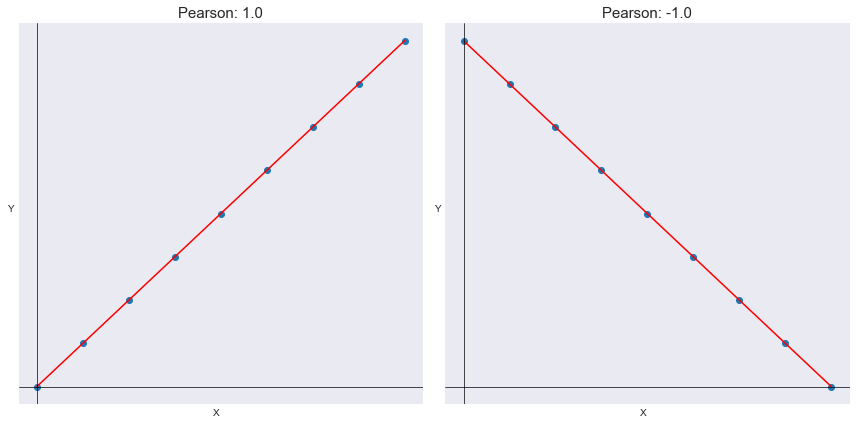

In [6]:
x_pearson_pos_max = [2, 3, 4, 5, 6, 7, 8, 9, 10]
y_pearson_pos_max = [1, 2, 3, 4, 5, 6, 7, 8, 9]

x_pearson_neg_min = [10, 9, 8, 7, 6, 5, 4, 3, 2]
y_pearson_neg_min = [1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.figure(figsize=(12, 6))

pearson_corr_pos_max = calculate_pearson_correlation(x_pearson_pos_max, y_pearson_pos_max)
ex1, _ = pearsonr(x_pearson_pos_max, y_pearson_pos_max)

pearson_corr_neg_min = calculate_pearson_correlation(x_pearson_neg_min, y_pearson_neg_min)
ex2, _ = pearsonr(x_pearson_neg_min, y_pearson_neg_min)

plot_correlation(x_pearson_pos_max,
                 y_pearson_pos_max, 
                 pearson_corr_pos_max,
                 title=f'Pearson: {pearson_corr_pos_max}',
                 subplot=121,
                 line=True)

plot_correlation(x_pearson_neg_min,
                 y_pearson_neg_min,
                 pearson_corr_neg_min,
                 title=f'Pearson: {pearson_corr_neg_min}',
                 subplot=122,
                 line=True)

plt.tight_layout()
plt.show()

É raro observar relações lineares no mundo real como no exemplo acima. Sendo assim, ao longo das décadas, outras medidas mais robustas foram criadas.

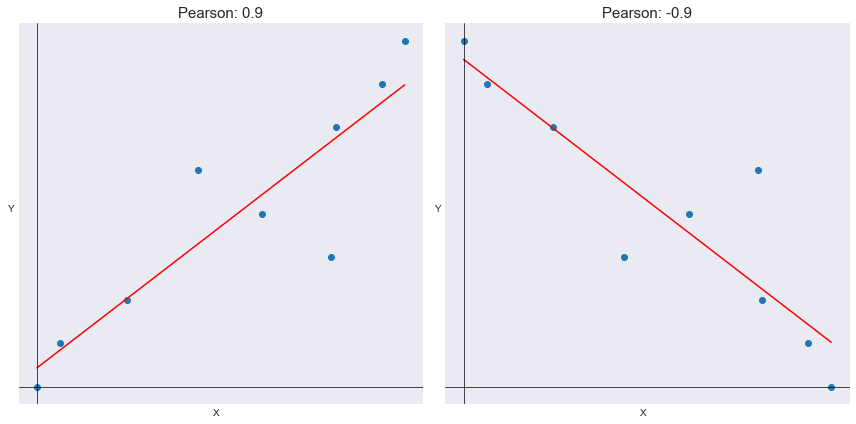

In [7]:
x_pearson_pos = [2.0, 2.5, 3.95, 8.4, 6.9, 5.5, 8.5, 9.5, 10.0]
y_pearson_pos = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

x_pearson_neg = [10.0, 9.5, 8.5, 5.5, 6.9, 8.4, 3.95, 2.5, 2.0]
y_pearson_neg = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

plt.figure(figsize=(12, 6))

pearson_corr_pos = calculate_pearson_correlation(x_pearson_pos, y_pearson_pos)

pearson_corr_neg = calculate_pearson_correlation(x_pearson_neg, y_pearson_neg)

plot_correlation(x_pearson_pos,
                 y_pearson_pos, 
                 pearson_corr_pos,
                 title=f'Pearson: {pearson_corr_pos}',
                 subplot=121,
                 line=True)

plot_correlation(x_pearson_neg,
                 y_pearson_neg,
                 pearson_corr_neg,
                 title=f'Pearson: {pearson_corr_neg}',
                 subplot=122,
                 line=True)

plt.tight_layout()
plt.show()

## Spearman

A correlação de Sperman (𝜌) é capaz de identificar a relação monotônica entre duas variáveis, ou seja, quando tendem a mudar juntas mas não necessariamente a uma taxa constante. O cálculo é dado pela fórmula:

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

As variáveis podem ser contínuas ou ordinais e, para cada variável, existe uma classificação de valores ao invés de basear-se nos dados brutos.

In [8]:
def calculate_spearman_correlation(x_data, y_data):
    
    '''
    
     Calcula a correlação de Spearman.
     
     Também é possível calcular com a biblioteca: from scipy.stats import spearmanr
     Exemplo:  
        spearman_correlation, _ = spearmanr(x_data, y_data)

        return round(spearman_correlation, 2)
         
     Parâmetros:
     x_data: Dados do eixo X
     y_data: Dados do eixo Y
    
    '''
    
    rank_x = rankdata(x_data)
    rank_y = rankdata(y_data)
    
    rank_x_mean = np.mean(rank_x)
    rank_y_mean = np.mean(rank_y)
    
    cov_rank_xy = np.sum((rank_x - rank_x_mean) * (rank_y - rank_y_mean))
    
    std_rank_x = np.sqrt(np.sum((rank_x - rank_x_mean) ** 2))
    std_rank_y = np.sqrt(np.sum((rank_y - rank_y_mean) ** 2))
    
    spearman_correlation = cov_rank_xy / (std_rank_x * std_rank_y)
    
    return round(spearman_correlation, 2)

Imagine o cenário que uma variável aumenta quando a outra também aumenta mas a quantidade não é consistente, o coeficiente de correlação de Pearson é positivo mas menor que +1, enquanto o coeficiente de Spearman ainda será +1 neste caso.

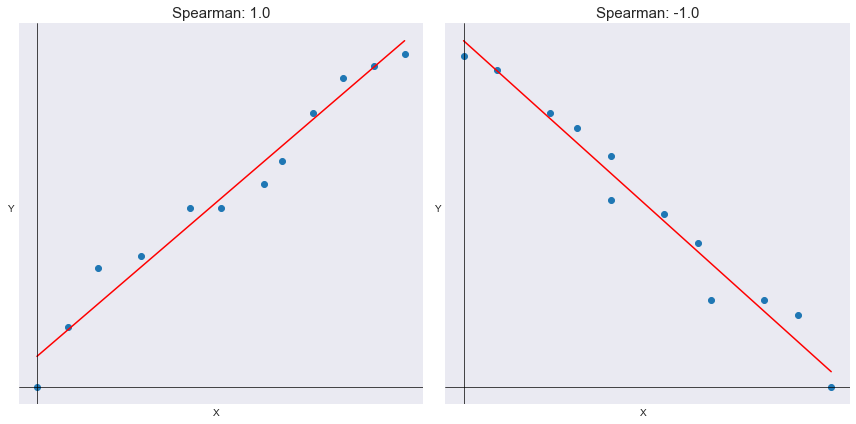

In [9]:
x_spearman_pos_max = [1.0, 1.5, 2.0, 2.7, 4.7, 4.0, 3.5, 5.5, 6.0, 6.5, 7.0, 5.0]
y_spearman_pos_max = [2.7, 3.2, 3.7, 3.8, 4.4, 4.2, 4.2, 5.0, 5.3, 5.4, 5.5, 4.6]

x_spearman_neg_min = [5.2, 7.0, 6.5, 6.0, 4.5, 3.7, 5.0, 3.2, 2.8, 2.0, 1.5, 3.7]
y_spearman_neg_min = [3.8, 3.2, 3.7, 3.8, 4.4, 4.5, 4.2, 5.0, 5.1, 5.4, 5.5, 4.8]

plt.figure(figsize=(12, 6))

spearman_corr_pos_max = calculate_spearman_correlation(x_spearman_pos_max, y_spearman_pos_max)

spearman_corr_neg_min = calculate_spearman_correlation(x_spearman_neg_min, y_spearman_neg_min)

plot_correlation(x_spearman_pos_max,
                 y_spearman_pos_max, 
                 spearman_corr_pos_max,
                 title=f'Spearman: {spearman_corr_pos_max}',
                 subplot=121,
                 line=True)

plot_correlation(x_spearman_neg_min,
                 y_spearman_neg_min,
                 spearman_corr_neg_min,
                 title=f'Spearman: {spearman_corr_neg_min}',
                 subplot=122,
                 line=True)

plt.tight_layout()
plt.show()

Quando os dados possuem relação monotônica que não é apenas linear, a correlação de Spearman fornece medidas melhores quando comparadas a correlação de Pearson. Veja alguns exemplos abaixo.

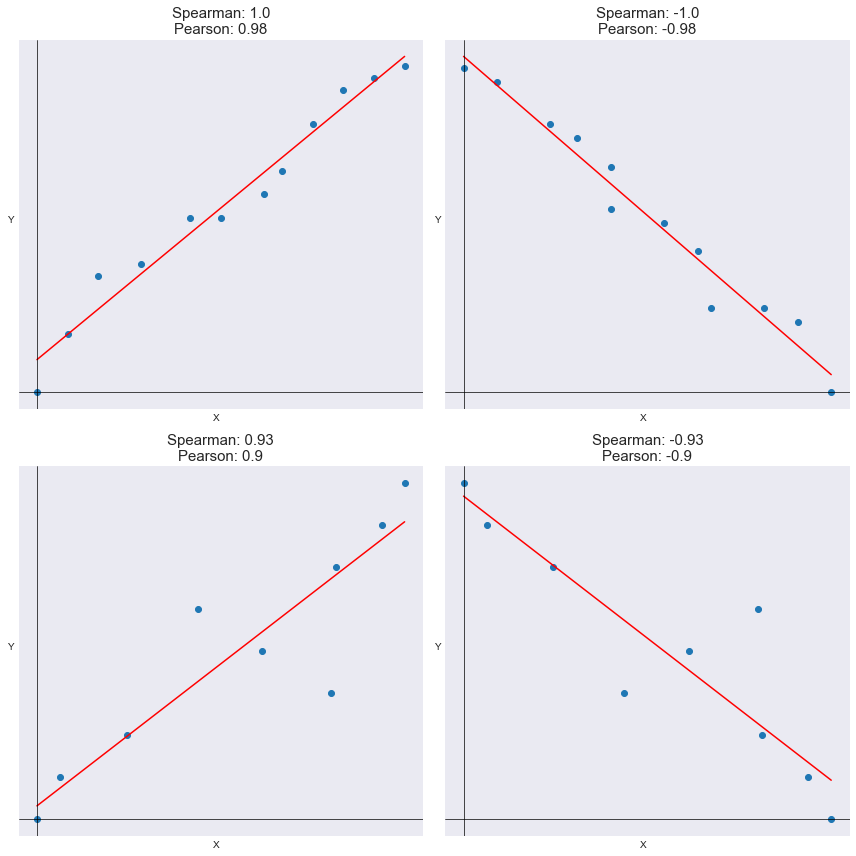

In [10]:
plt.figure(figsize=(12, 12))

pearson_comp_pos = calculate_pearson_correlation(x_spearman_pos_max, y_spearman_pos_max)

pearson_comp_neg = calculate_pearson_correlation(x_spearman_neg_min, y_spearman_neg_min)

spearman_comp_pos = calculate_spearman_correlation(x_pearson_pos, y_pearson_pos)

spearman_comp_neg = calculate_spearman_correlation(x_pearson_neg, y_pearson_neg)

plot_correlation(x_spearman_pos_max,
                 y_spearman_pos_max, 
                 pearson_comp_pos,
                 title=f'Spearman: {spearman_corr_pos_max}\nPearson: {pearson_comp_pos}',
                 subplot=221,
                 line=True)

plot_correlation(x_spearman_neg_min,
                 y_spearman_neg_min,
                 pearson_comp_neg,
                 title=f'Spearman: {spearman_corr_neg_min}\nPearson: {pearson_comp_neg}',
                 subplot=222,
                 line=True)

plot_correlation(x_pearson_pos,
                 y_pearson_pos, 
                 spearman_comp_pos,
                 title=f'Spearman: {spearman_comp_pos}\nPearson: {pearson_corr_pos}',
                 subplot=223,
                 line=True)

plot_correlation(x_pearson_neg,
                 y_pearson_neg,
                 spearman_comp_neg,
                 title=f'Spearman: {spearman_comp_neg}\nPearson: {pearson_corr_neg}',
                 subplot=224,
                 line=True)

plt.tight_layout()
plt.show()

## ξ

No estudo de <a href=https://towardsdatascience.com/a-new-coefficient-of-correlation-64ae4f260310>Chatterjee (2020)</a> é proposto um novo método, representado pela letra ξ, quando a relação das variáveis não é monotônica, ou seja, pode ser aplicado em dados de séries temporais.

O objetivo é medir o quanto *Y* é uma função de *X*, diferente das técnicas de correlação tradicionais, em que a medida entre *X* e *Y* é sempre igual de *Y* e *X*.

Apesar da sutil diferença, facilitará a compreensão das fórmulas, pois não é mais necessariamente o caso de que ξ(*X*, *Y*) seja igual a ξ(*Y*, *X*).

Nesse método, ao invés das medidas serem de -1 a 1, são de 0 a 1. Sendo, ξ = 0 quando *Y* não é função de *X* e ξ = 1 quando Y é função de *X* de uma forma muito forte.

Ao avaliar a dependência de *Y* em relação a *X*, cada ponto de dado é um par ordenado (*X*, *Y*) a ser considerado. Primeiro, é necessário ordenar os dados na sequência (*X₍₁₎*, *Y₍₁₎*),…,(*X₍ₙ₎*, *Y₍ₙ₎*), assegurando que *X₍₁₎* ≤ *X₍₂₎* ≤ ⋯ ≤ *X₍ₙ₎*. Em sequência, atribuir variáveis *r₁*, *r₂*, … , *rₙ*, nas quais *rᵢ* indica a posição de *Y₍ᵢ₎* na ordenação. Com essas posições determinadas, o cálculo é dado pelas fórmulas:

Sem empates nos dados:

$$
\xi_n(X, Y) := 1 - \frac{3 \cdot \sum_{i=1}^{n-1} \left| r_{i+1} - r_i \right|}{n^2 - 1}
$$

Com empates nos dados:

$$
\xi_n(X, Y) := 1 - \frac{n \cdot \sum_{i=1}^{n-1} \left| r_{i+1} - r_i \right|}{2 \cdot \sum_{l=1}^{n-1} l_i \cdot (n - l_i)}
$$

In [11]:
def calculate_ξ_correlation(x_data, y_data, ties=None):
    
    '''
    
     Calcula a correlação de ξ.
    
     Parâmetros:
     x_data: Dados do eixo X
     y_data: Dados do eixo Y
     ties: Informe de há empates nos dados True ou False. Default = None
    
    '''
    
    np.random.seed(42)
    
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    
    n = len(x_data)
    
    order = np.array([i[0] for i in sorted(enumerate(x_data), key=lambda x: x[1])])
    
    if ties:
        l = np.array([sum(y >= y_data[order]) for y in y_data[order]])
        r = l.copy()
        
        for j in range(n):
            if sum([r[j] == r[i] for i in range(n)]) > 1:
                tie_index = np.array([r[j] == r[i] for i in range(n)])
                r[tie_index] = np.random.choice(r[tie_index] - \
                               np.arange(0, sum([r[j] == r[i] for i in range(n)])), sum(tie_index), replace=False)
        
        return round(1 - n*sum( abs(r[1:] - r[:n-1]) ) / (2*sum(l*(n - l))), 2)
    else:
        r = np.array([sum(y >= y_data[order]) for y in y_data[order]])
        
        return round(1 - 3 * sum( abs(r[1:] - r[:n-1]) ) / (n**2 - 1), 2)

Imagine os seguintes dados para *X* e *Y*:


| X | Y |
| :- | -: |
| 1 | 3 |
| 6 | 7 |
| 2 | 2 |
| 4 | 5 |


Ordenados seriam:


| X | Y |
| :- | -: |
| 1 | 3 |
| 2 | 2 |
| 4 | 5 |
| 6 | 7 |


Por fim, as posições são determinadas por *rᵢ*. Por exemplo, quando *Y* = 5, a posição que *X* assume quando está ordenado é 3. Logo, *rᵢ* para (4, 5) onde *ᵢ* é igual a 3, conforme a tabela abaixo.

| X | Y | r |
| :- | -: | -: |
| 1 | 3 | 1 |
| 6 | 7 | 4 |
| 2 | 2 | 2 |
| 4 | 5 | 3 |


Quando há empates nos dados, além de usar uma segunda fórmula, é preciso embaralhar os empates de forma aleatória. Assim, um valor é classificado como mais alto ou mais baixo que outro, garantindo que a diferença entre as posições consecutivas (*rᵢ₊₁* - *rᵢ*) nunca seja zero. Portanto, *lᵢ* informa quantas vezes *Yᵢ* é igual ou maior que outros valores de *Y*.


O gráfico a seguir informa o valor de cada correlação abordada para um conjunto de dados em que a relação das variáveis não é monotônica.

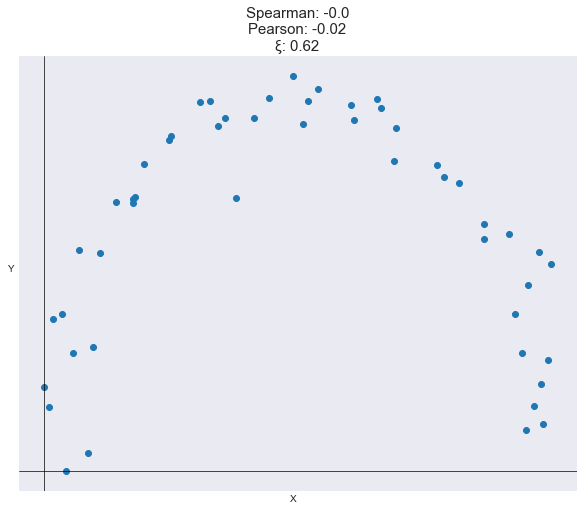

In [12]:
np.random.seed(42)

theta_clustered = np.linspace(0, np.pi, 40)

x_clustered = 10 * np.cos(theta_clustered) + np.random.normal(0, 0.5, 40)
y_clustered = 10 * np.sin(theta_clustered) + np.random.normal(0, 0.5, 40)

theta_disperse = np.linspace(0, np.pi, 50 - 40)

x_disperse = 10 * np.cos(theta_disperse) + np.random.normal(0, 2, 50 - 40)
y_disperse = 10 * np.sin(theta_disperse) + np.random.normal(0, 2, 50 - 40)

x_ξ = np.concatenate((x_clustered, x_disperse))
y_ξ = np.concatenate((y_clustered, y_disperse))

indices = np.arange(50)

np.random.shuffle(indices)

x_ξ = x_ξ[indices]
y_ξ = y_ξ[indices]

plt.figure(figsize=(10, 8))

spearman_comp_ξ = calculate_spearman_correlation(x_ξ, y_ξ)

pearson_comp_ξ = calculate_pearson_correlation(x_ξ, y_ξ)

ξ_comp = calculate_ξ_correlation(x_ξ, y_ξ, ties=True)

plot_correlation(x_ξ,
                 y_ξ,
                 title=f'Spearman: {spearman_comp_ξ}\nPearson: {pearson_comp_ξ}\nξ: {ξ_comp}',
                 line=False)

Vale ressaltar que a correlação será maior caso a ordenação natural dos pares *X*, *Y* seja muito próxima da classificação de ordenação do que foi calculado. Já para dados esparsos, esse método não é recomendado.

In [13]:
x_sin = np.linspace(0, 6 * np.pi, 30)
y_sin = 5 * np.sin(0.4 * x_sin + (np.pi / 2))

x_non = np.linspace(0, 1 * np.pi, 50)
y_non = -(np.sin(x_non) + np.random.normal(0, 0.1, x_non.size))

x_wave = np.linspace(0, 4 * np.pi, 100)
y_wave = np.sin(x_wave) + np.random.normal(0, 0.3, x_wave.size)

np.random.seed(42)

x_clustered = np.linspace(0, 10, 20)
y_clustered = np.linspace(0, 10, 20) + np.random.normal(0, 1, 20)

x_disperse = np.linspace(20, 10, 30 - 20)
y_disperse = np.linspace(0, 5, 30 - 20) + np.random.normal(0, 2, 30 - 20)

x_rand = np.concatenate((x_clustered, x_disperse))
y_rand = np.concatenate((y_clustered, y_disperse))

indexes = np.arange(30)

np.random.shuffle(indexes)

x_rand = x_rand[indexes]
y_rand = y_rand[indexes]

x_spread = np.random.choice(range(100), 30, replace=False)
y_spread = np.random.random(30) * 100

x_sort = np.random.choice(range(100), 40, replace=False)
x_sort.sort()
y_sort = 2 * x_sort + np.random.normal(0, 10, 40)

Por fim, seguem outros exemplos de gráficos que comparam o valor de cada correlação.

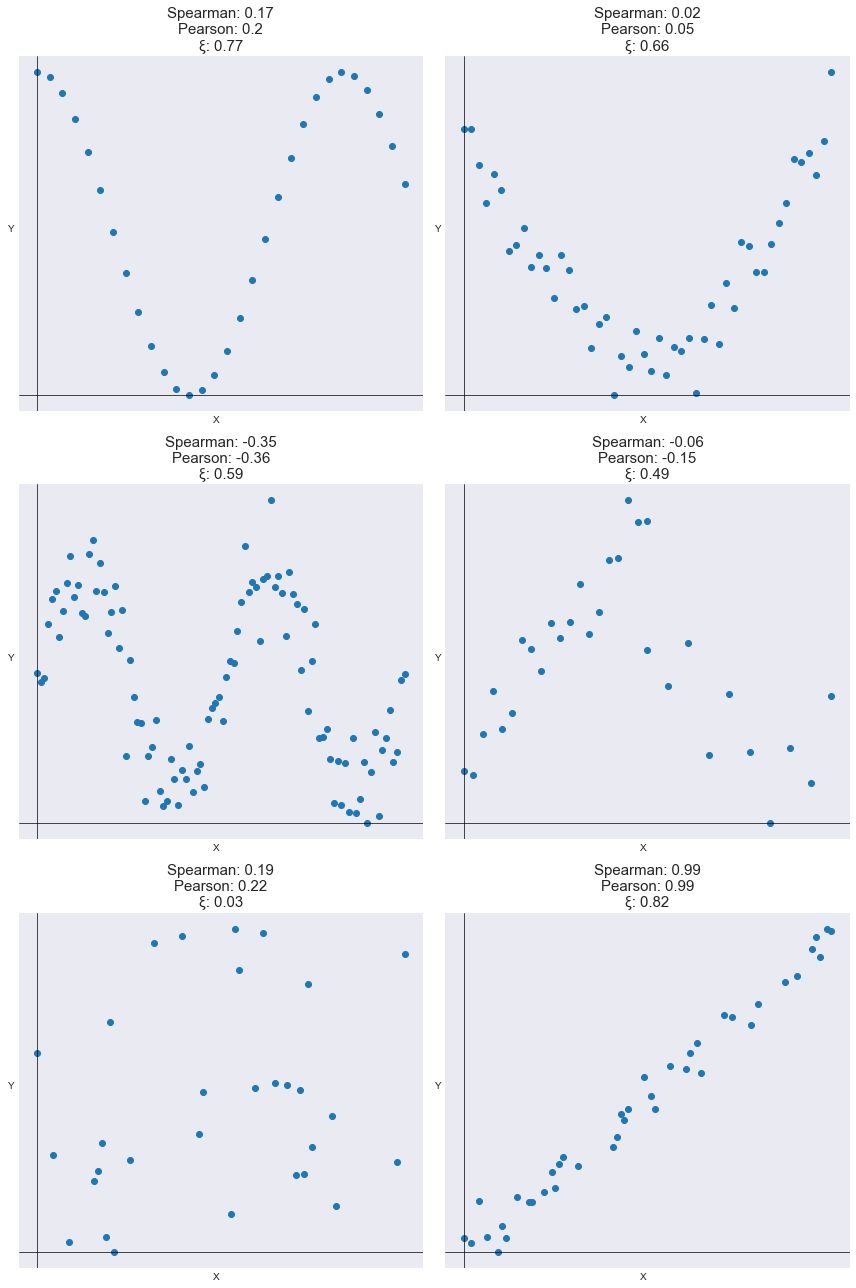

In [14]:
plt.figure(figsize=(12, 18))

spearman_comp_sin = calculate_spearman_correlation(x_sin, y_sin)

pearson_comp_sin = calculate_pearson_correlation(x_sin, y_sin)

ξ_comp_sin = calculate_ξ_correlation(x_sin, y_sin, ties=False)

spearman_comp_non = calculate_spearman_correlation(x_non, y_non)

pearson_comp_non = calculate_pearson_correlation(x_non, y_non)

ξ_comp_non = calculate_ξ_correlation(x_non, y_non, ties=False)

spearman_comp_wave = calculate_spearman_correlation(x_wave, y_wave)

pearson_comp_wave = calculate_pearson_correlation(x_wave, y_wave)

ξ_comp_wave = calculate_ξ_correlation(x_wave, y_wave, ties=False)

spearman_comp_rand = calculate_spearman_correlation(x_rand, y_rand)

pearson_comp_rand = calculate_pearson_correlation(x_rand, y_rand)

ξ_comp_rand = calculate_ξ_correlation(x_rand, y_rand, ties=False)

spearman_comp_spread = calculate_spearman_correlation(x_spread, y_spread)

pearson_comp_spread = calculate_pearson_correlation(x_spread, y_spread)

ξ_comp_spread = calculate_ξ_correlation(x_spread, y_spread, ties=True)

spearman_comp_sort = calculate_spearman_correlation(x_sort, y_sort)

pearson_comp_sort = calculate_pearson_correlation(x_sort, y_sort)

ξ_comp_sort = calculate_ξ_correlation(x_sort, y_sort, ties=False)

plot_correlation(x_sin,
                 y_sin,
                 title=f'Spearman: {spearman_comp_sin}\nPearson: {pearson_comp_sin}\nξ: {ξ_comp_sin}',
                 subplot=321,
                 line=False)

plot_correlation(x_non,
                 y_non,
                 title=f'Spearman: {spearman_comp_non}\nPearson: {pearson_comp_non}\nξ: {ξ_comp_non}',
                 subplot=322,
                 line=False)

plot_correlation(x_wave,
                 y_wave, 
                 title=f'Spearman: {spearman_comp_wave}\nPearson: {pearson_comp_wave}\nξ: {ξ_comp_wave}',
                 subplot=323,
                 line=False)

plot_correlation(x_rand,
                 y_rand,
                 title=f'Spearman: {spearman_comp_rand}\nPearson: {pearson_comp_rand}\nξ: {ξ_comp_rand}',
                 subplot=324,
                 line=False)

plot_correlation(x_spread,
                 y_spread,
                 title=f'Spearman: {spearman_comp_spread}\nPearson: {pearson_comp_spread}\nξ: {ξ_comp_spread}',
                 subplot=325,
                 line=False)

plot_correlation(x_sort,
                 y_sort,
                 title=f'Spearman: {spearman_comp_sort}\nPearson: {pearson_comp_sort}\nξ: {ξ_comp_sort}',
                 subplot=326,
                 line=False)

plt.tight_layout()
plt.show()

## Referências

LARSON, R. e FARBER, B. Estatística aplicada. São Paulo: Pearson Education do Brasil, 2015.


S. CHATTERJEE, *A New Coefficient of Correlation* (2020), *Journal of the American Statistical Association*.